    speed  shoot  pass  dribble  defense  physical  predict
0     100     95    95      103       41        72        0
1      91    101    83       96       44        91        0
2     105     93    89       99       57        72        0
3     105     96    89       99       50        83        0
4     106     97    82      101       41        89        0
5      90     96    90       96       50        85        0
6      90    100    90       94       57        91        0
7      84     90   102       94       80        83        1
8     102     93    87      102       56        95        0
9     103     98    87       98       56        87        0
10     88     99    85       93       51        93        0
11     95     71    80       82       98        97        1
12    106     91    90      100       55        90        0
13     98     98    76       98       43        92        0
14     98     95    96       99       71        97        0


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

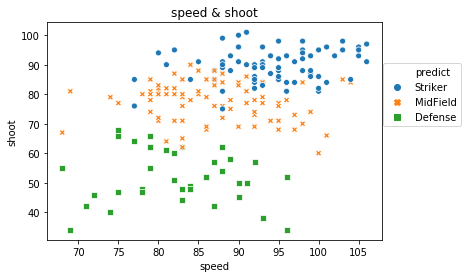

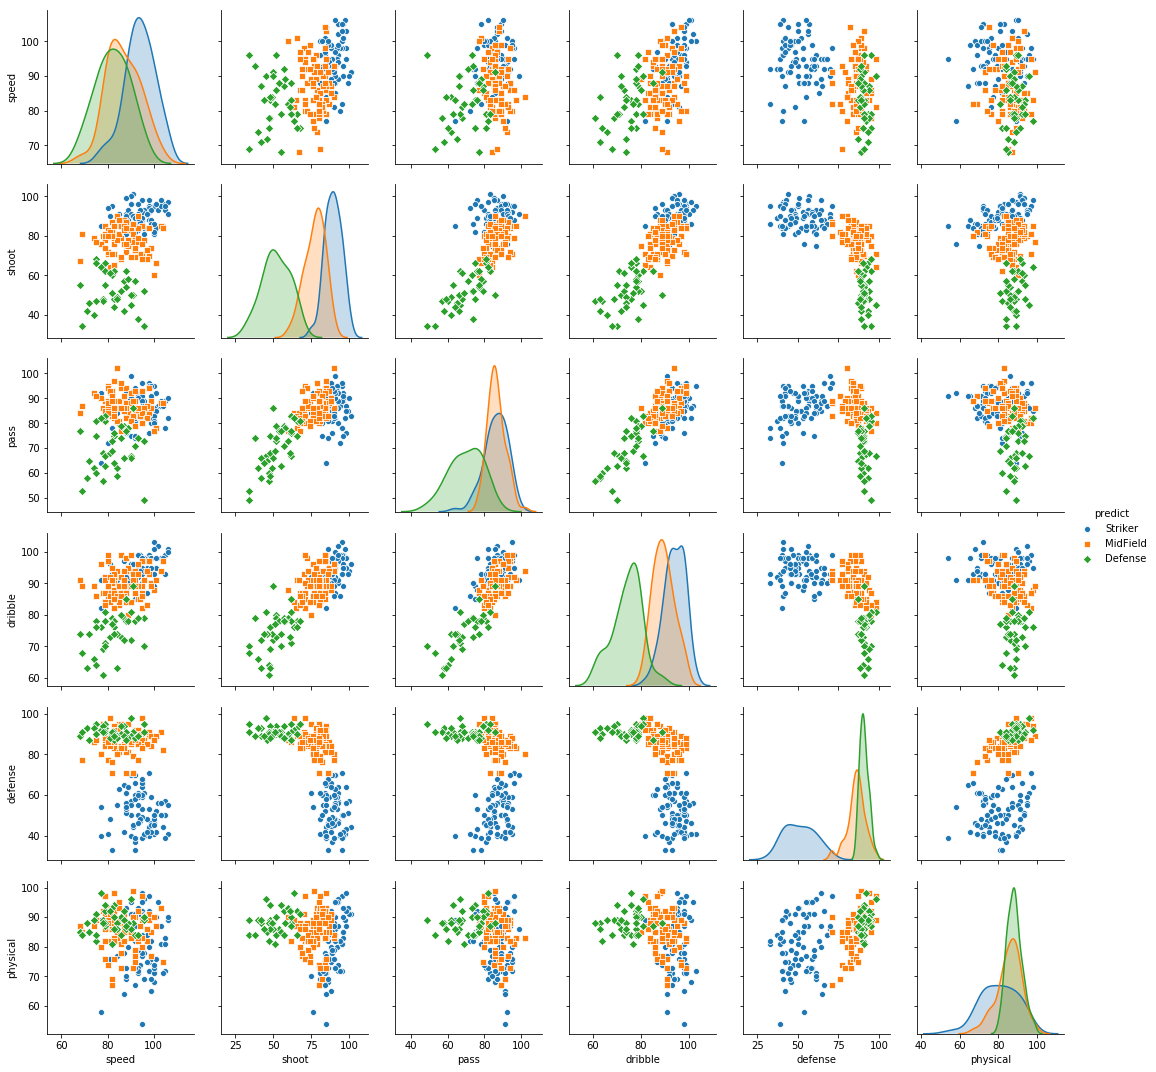

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

players = pd.read_csv("player_data.csv")

feature = players[["speed", "shoot", "pass", "dribble", "defense", "physical"]]
name = players["name"]

model = KMeans(n_clusters=3)
model.fit(feature)
result_kmeans = model.predict(feature)

predict = pd.DataFrame(result_kmeans)
predict.columns = ['predict']

r = pd.concat([feature, predict], axis=1)
print(r.head(15))
for idx, i in enumerate(r['predict']):
    if i == 0:
        r['predict'][idx] = "Striker"
    elif i == 1:
        r['predict'][idx] = "MidField"
    elif i == 2 :
        r['predict'][idx] = "Defense"

g = sns.scatterplot(x="speed", y="shoot", hue = 'predict', style = 'predict', data=r)
sns.pairplot(r, hue="predict", markers=["o", "s", "D"])
plt.xlabel('Speed')
plt.ylabel('Shoot')
g.set_title("speed & shoot")
g.legend(loc='lower right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

In [9]:
from sklearn.manifold import TSNE

layers = pd.read_csv("player_data.csv")

feature = players[["speed", "shoot", "pass", "dribble", "defense", "physical"]]
name = players["name"]

model = KMeans(n_clusters=3)
model.fit(feature)
result_kmeans = model.predict(feature)

predict = pd.DataFrame(result_kmeans)
predict.columns = ['predict']

r = pd.concat([feature, predict], axis=1)
print(r.head(15))
#for idx, i in enumerate(r['predict']):
#    if i == 0:
#        r['predict'][idx] = "Striker"
#    elif i == 1:
#        r['predict'][idx] = "MidField"
#    elif i == 2 :
#        r['predict'][idx] = "Defense"

    speed  shoot  pass  dribble  defense  physical  predict
0     100     95    95      103       41        72        1
1      91    101    83       96       44        91        1
2     105     93    89       99       57        72        1
3     105     96    89       99       50        83        1
4     106     97    82      101       41        89        1
5      90     96    90       96       50        85        1
6      90    100    90       94       57        91        1
7      84     90   102       94       80        83        0
8     102     93    87      102       56        95        1
9     103     98    87       98       56        87        1
10     88     99    85       93       51        93        1
11     95     71    80       82       98        97        0
12    106     91    90      100       55        90        1
13     98     98    76       98       43        92        1
14     98     95    96       99       71        97        1


In [10]:
feature_df = pd.DataFrame(feature)

transformed = TSNE(n_components=2).fit_transform(feature_df)
transformed.shape

(200, 2)

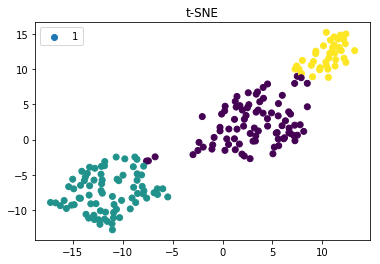

In [13]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys, c=r['predict'])  #라벨은 색상으로 분류됨
plt.title("t-SNE")
plt.legend(r['predict'])
plt.show()